In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-data/Churn-Data.csv


## **INTRODUCTION**
<br>

#### What is Customer Churn?
<br>
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.


Objectives<br>
I will explore the data and try to answer some questions like:

* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on the gender?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

## Loading the Dataset

In [3]:
df = pd.read_csv('/kaggle/input/churn-data/Churn-Data.csv')

## Understanding and Exploring the Data

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [4]:
df.head()

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


The data set includes information about:

* Customers who left within the last month – the column is called Churn

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* Demographic info about customers – gender, age range, and if they have partners and dependents

In [5]:
df.describe()

,SeniorCitizen,tenure,Charges_Month
count,5634.000000,5634.000000,5634.000000
mean,0.160809,32.373092,64.864253
std,0.367388,24.424539,30.089324
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.525000
75%,0.000000,55.000000,89.937500
max,1.000000,72.000000,118.600000


We can see that Senior Citizen data is numerical, So we can try to change it to object data type at a later step

In [6]:
df.describe(include='O').T

,count,unique,top,freq
cID,5634,5634,4223-BKEOR,1
gender,5634,2,Male,2887
Partner,5634,2,No,2904
Dependents,5634,2,No,3951
PhoneService,5634,2,Yes,5082
MultipleLines,5634,3,No,2685
InternetService,5634,3,Fiber optic,2481
OnlineSecurity,5634,3,No,2810
OnlineBackup,5634,3,No,2448
DeviceProtection,5634,3,No,2489


We can observe that Total Charges has 5300 unique values out of 5634 values.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cID               5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  TV_Streaming      5634 non-null   object 
 14  Movie_Streaming   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


There are no missing values in the dataset

In [8]:
df.shape

(5634, 21)

In [9]:
df.isnull().sum()

cID                 0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
TV_Streaming        0
Movie_Streaming     0
Contract            0
PaperlessBilling    0
Method_Payment      0
Charges_Month       0
TotalCharges        0
Churn               0
dtype: int64

## Data Manipulation

The column cID is not necessary for Churn, hence, we can remove it from the dataset.

In [10]:
df.drop(['cID'], axis = 1, inplace = True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [11]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   int64  
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  TV_Streaming      5634 non-null   object 
 13  Movie_Streaming   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  Method_Payment    5634 non-null   object 


Let's check the dataset to see if there is any indirect missing value

In [13]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
TV_Streaming         0
Movie_Streaming      0
Contract             0
PaperlessBilling     0
Method_Payment       0
Charges_Month        0
TotalCharges        10
Churn                0
dtype: int64

Here we see that the TotalCharges has 10 missing values. Let's check this data.

In [14]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
4,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
282,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2419,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2734,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
2903,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3974,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5023,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5030,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5343,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5599,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
Let's see if there are any other 0 values in the tenure column.

In [15]:
df[df['tenure'] == 0].index

Index([4, 282, 2419, 2734, 2903, 3974, 5023, 5030, 5343, 5599], dtype='int64')

There are no additional missing values in the Tenure column.
Let's delete the rows with missing values in Tenure columns since there are only 10 rows and deleting them will not affect the data.

In [16]:
df.drop(labels=df[df['tenure'] == 0].index, axis = 0, inplace = True)

In [17]:
df[df['SeniorCitizen'] == 0].index

Index([   0,    1,    2,    3,    5,    6,    7,    8,    9,   13,
       ...
       5622, 5623, 5624, 5626, 5627, 5628, 5629, 5630, 5631, 5633],
      dtype='int64', length=4718)

In [18]:
df[df['Churn'] == 'No'].index

Index([   0,    1,    5,    6,    7,    9,   11,   12,   13,   14,
       ...
       5619, 5620, 5622, 5623, 5625, 5626, 5627, 5630, 5631, 5633],
      dtype='int64', length=4128)

In [19]:
df.describe()

,SeniorCitizen,tenure,Charges_Month,TotalCharges
count,5624.000000,5624.000000,5624.000000,5624.000000
mean,0.161095,32.430654,64.911620,2291.154605
std,0.367652,24.408029,30.081601,2263.151534
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.800000,411.512500
50%,0.000000,29.000000,70.550000,1410.800000
75%,0.000000,55.000000,89.950000,3808.850000
max,1.000000,72.000000,118.600000,8684.800000


To solve the problem of missing values in TotalCharges column, We are going to fill it with the mean of TotalCharges values.

In [20]:
df.fillna(df['TotalCharges'].mean)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,No
1,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
5,Male,0,No,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes
5630,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30,No
5631,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5632,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [21]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
TV_Streaming        0
Movie_Streaming     0
Contract            0
PaperlessBilling    0
Method_Payment      0
Charges_Month       0
TotalCharges        0
Churn               0
dtype: int64

Let's change the datatype of SeniorCitizen column from Numerical to an Object type

In [22]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:'No', 1:'Yes'})

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,Female,No,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,No
1,Female,No,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,Male,No,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,Male,No,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
5,Male,No,No,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,No


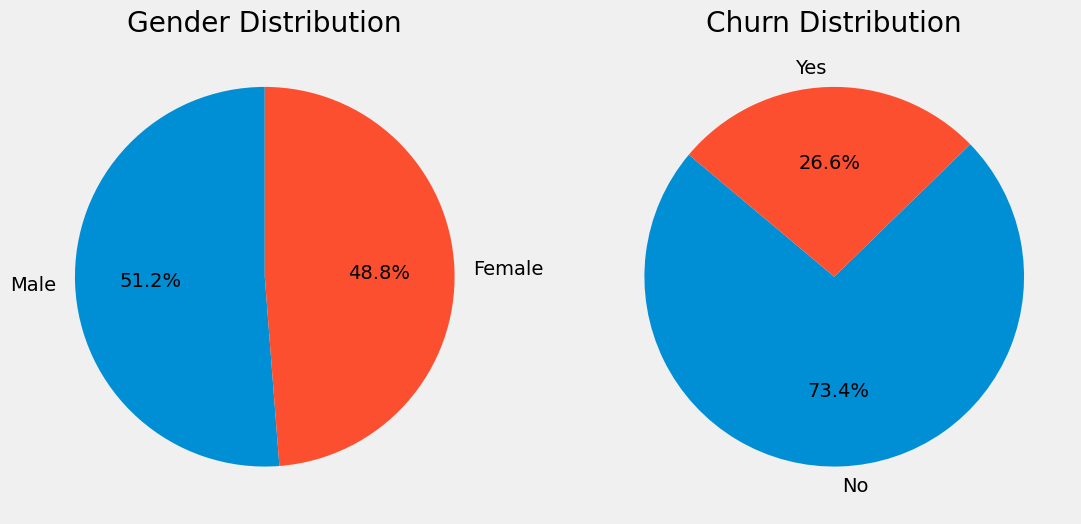

In [24]:
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Count the occurrences of each churn status
churn_counts = df['Churn'].value_counts()

# Plotting the gender distribution pie chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

# Plotting the churn distribution pie chart
plt.subplot(1, 2, 2)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')

plt.show()

In [25]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    1999
Male      2129
Name: Churn, dtype: int64

In [26]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    744
Male      752
Name: Churn, dtype: int64

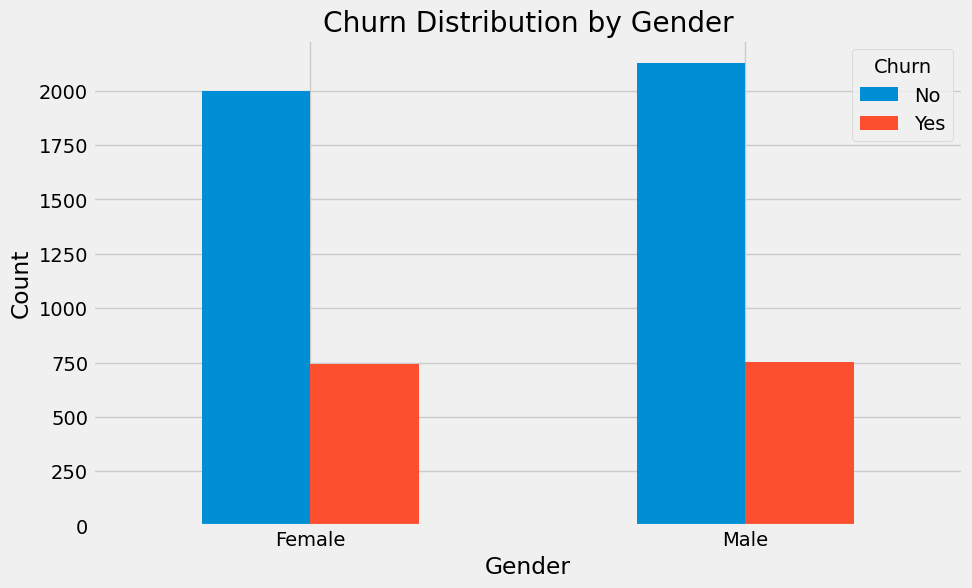

In [27]:
# Group by gender and churn status and count occurrences
gender_churn_counts = df.groupby(['gender', 'Churn']).size().unstack()

# Plotting the grouped bar chart
gender_churn_counts.plot(kind='bar', stacked=False, figsize=(10, 6))

plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

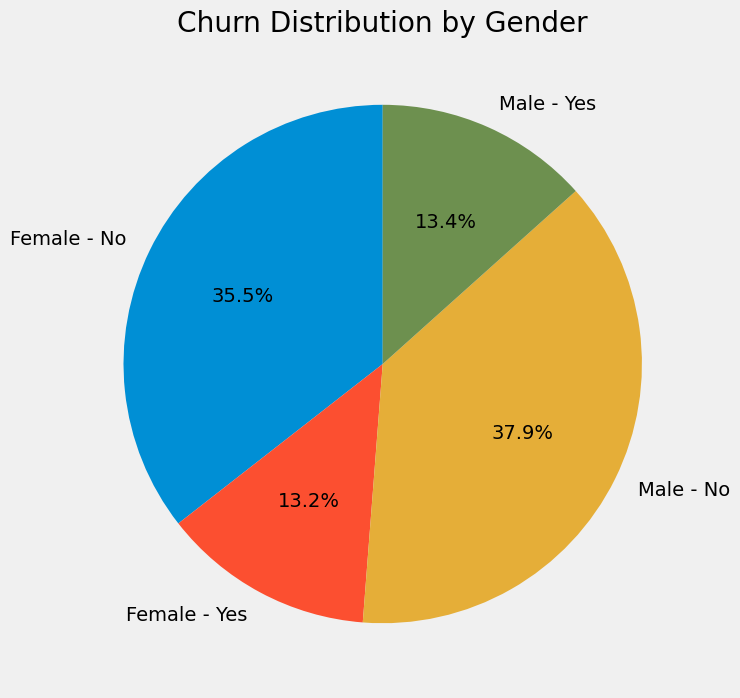

In [28]:
# Calculate the counts of each combination of gender and churn
gender_churn_counts = df.groupby(['gender', 'Churn']).size()

# Create labels for the pie chart
labels = [f'{gender} - {churn}' for gender, churn in gender_churn_counts.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_churn_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution by Gender')
plt.show()

There is almost no difference in the number of male and female customers who left for a different firm

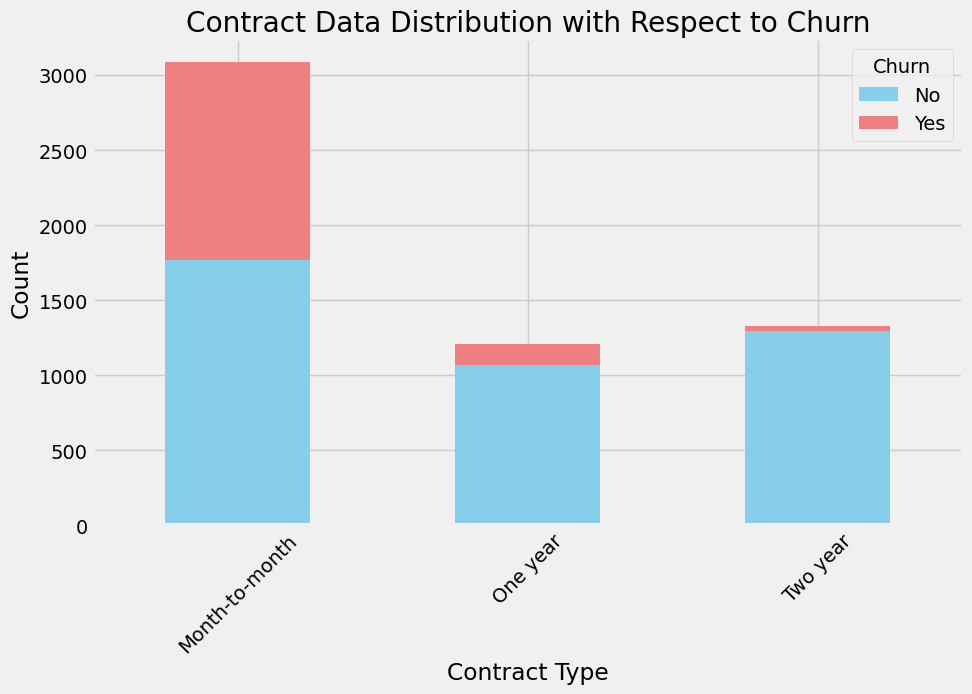

In [60]:
# Group by contract type and churn status and count occurrences
contract_churn_counts = df.groupby(['Contract', 'Churn']).size().unstack()

# Plotting the stacked bar chart
contract_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Contract Data Distribution with Respect to Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

Month-to-Month type Cutomers have the highest Churn rate, as compared to Two Year type customers

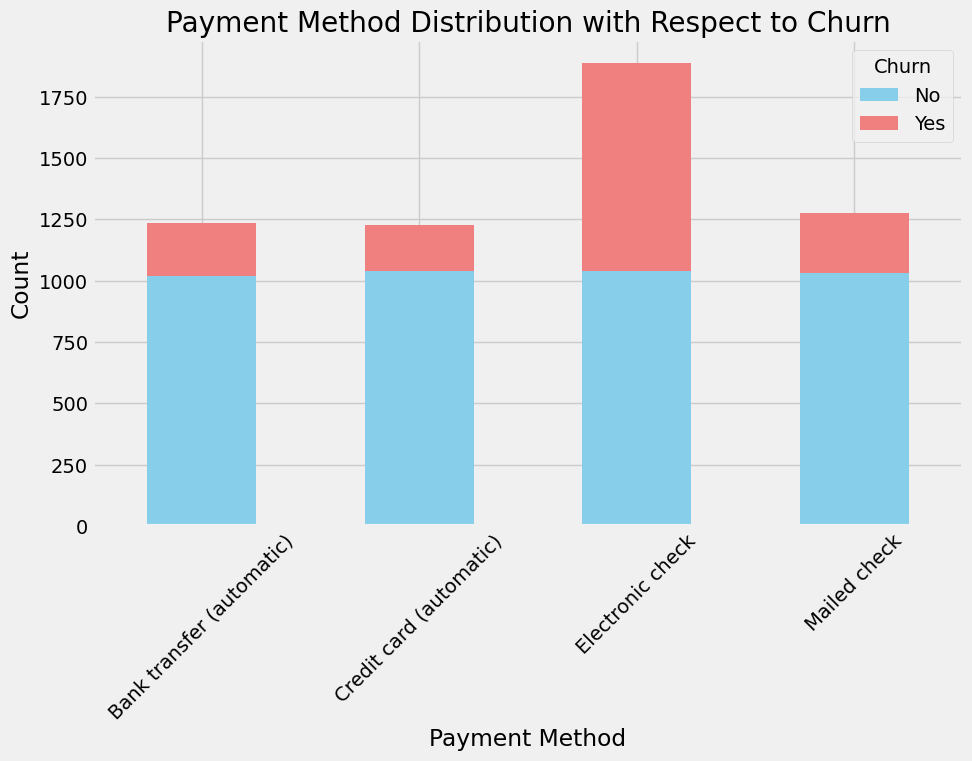

In [30]:
payment_churn_counts = df.groupby(['Method_Payment', 'Churn']).size().unstack()
payment_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Payment Method Distribution with Respect to Churn')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

Customers who paid using Electronic checks have a very high churn rate.

In [31]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [32]:
 df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       806
Fiber optic      No       749
No               No       574
Fiber optic      Yes      502
DSL              Yes      201
No               Yes       49
Name: count, dtype: int64

In [33]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       757
Fiber optic      No       701
No               No       541
Fiber optic      Yes      529
DSL              Yes      171
No               Yes       44
Name: count, dtype: int64

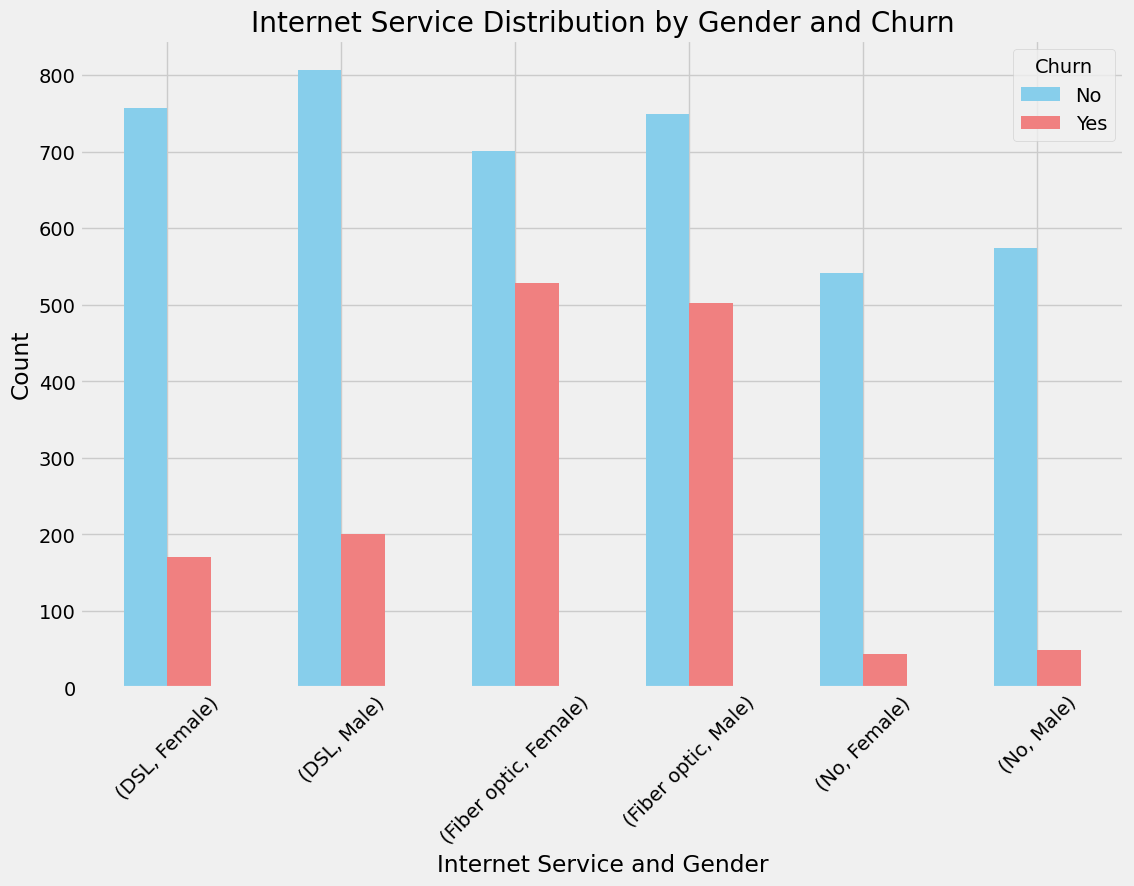

In [34]:
internet_gender_churn_counts = df.groupby(['InternetService', 'gender', 'Churn']).size().unstack(fill_value=0)
internet_gender_churn_counts.plot(kind='bar', stacked=False, figsize=(12, 8), color=['skyblue', 'lightcoral'])

plt.title('Internet Service Distribution by Gender and Churn')
plt.xlabel('Internet Service and Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [35]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,Female,No,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80,No
1,Female,No,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,Male,No,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,Male,No,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
5,Male,No,No,No,7,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.55,521.35,No


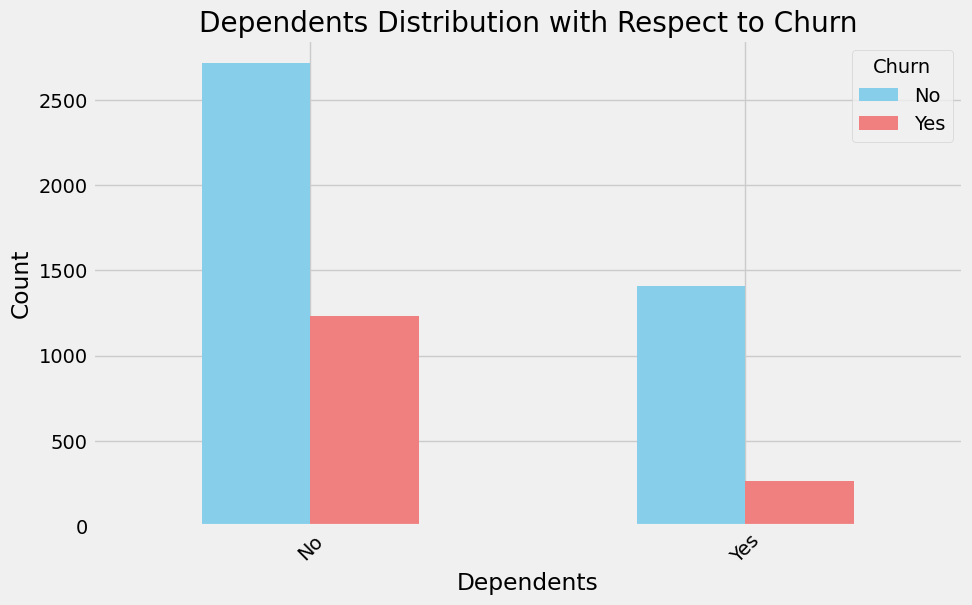

In [36]:
dependent_churn_counts = df.groupby(['Dependents', 'Churn']).size().unstack()
dependent_churn_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Dependents Distribution with Respect to Churn')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

Customers without dependents are more likely to churn

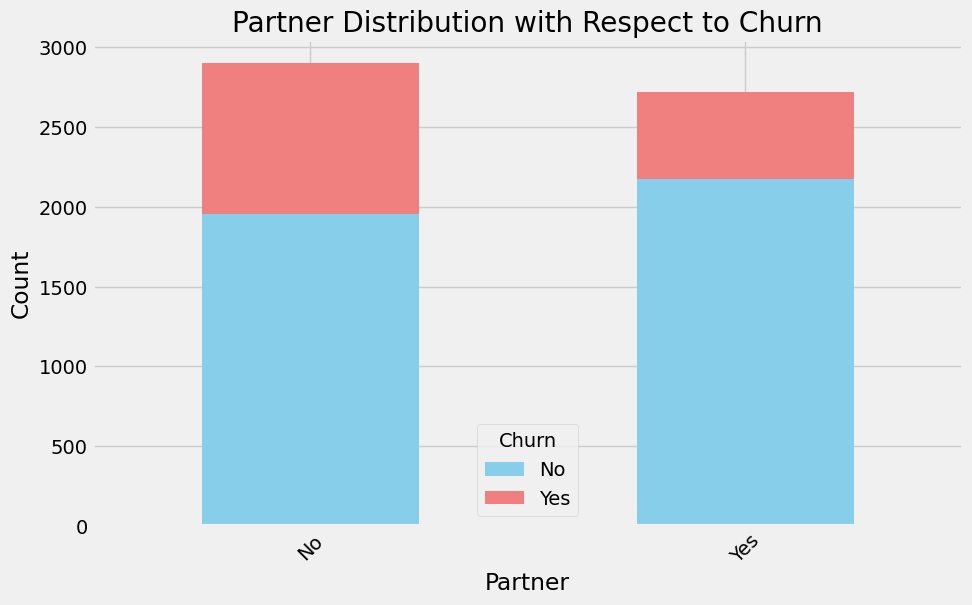

In [37]:
partner_churn_counts = df.groupby(['Partner', 'Churn']).size().unstack()
partner_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Partner Distribution with Respect to Churn')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

Customers that doesn't have partners are more likely to churn

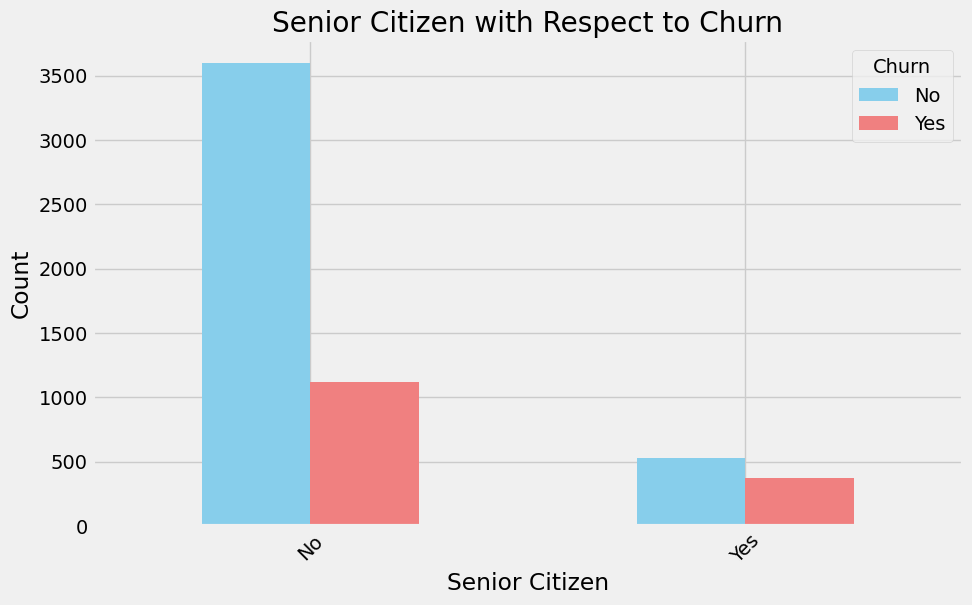

In [38]:
senior_citizen_churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
senior_citizen_churn_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Senior Citizen with Respect to Churn')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

Senior Citizens have a very high chance to churn.

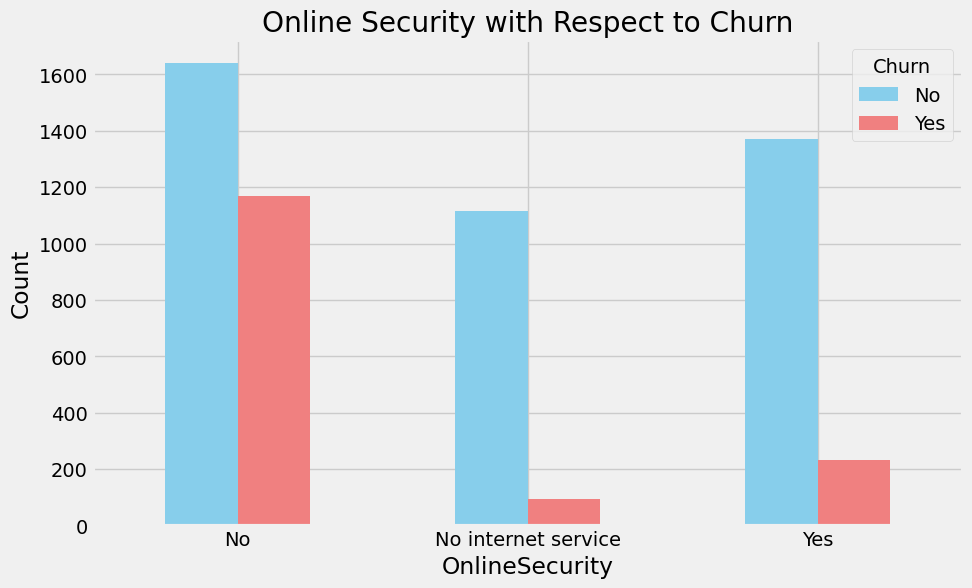

In [39]:
online_security_churn_counts = df.groupby(['OnlineSecurity', 'Churn']).size().unstack()
online_security_churn_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Online Security with Respect to Churn')
plt.xlabel('OnlineSecurity')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

Absence of Online Security is a major point affecting the churn rate of cutomers.

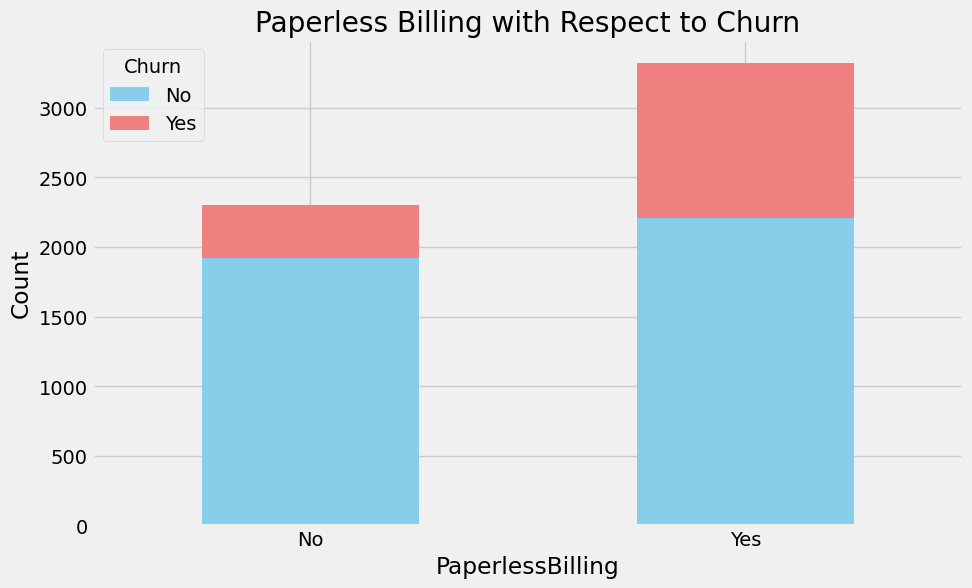

In [40]:
paperless_billing_churn_counts = df.groupby(['PaperlessBilling', 'Churn']).size().unstack()
paperless_billing_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Paperless Billing with Respect to Churn')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

Customers with Paperless Billing are most likely to churn.

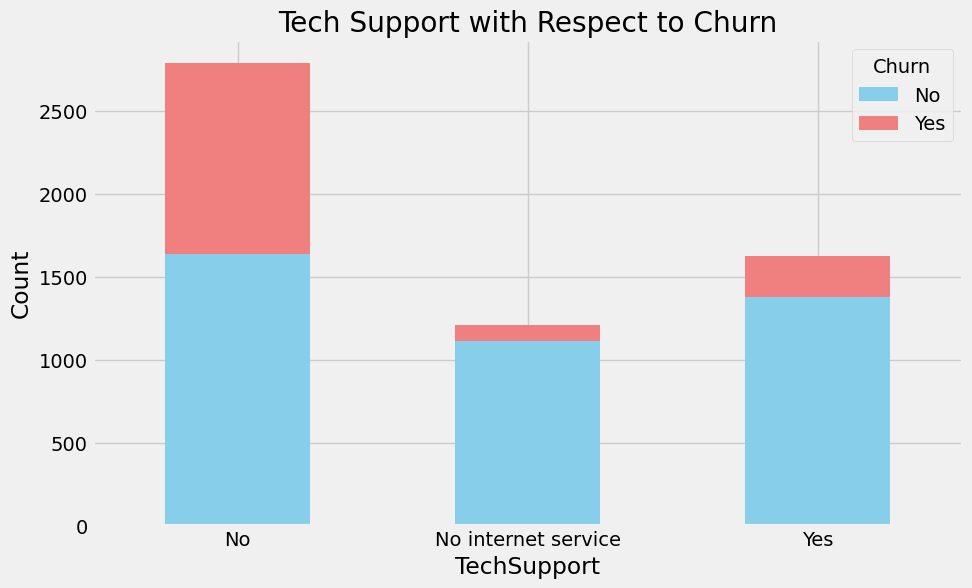

In [41]:
tech_support_churn_counts = df.groupby(['TechSupport', 'Churn']).size().unstack()
tech_support_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Tech Support with Respect to Churn')
plt.xlabel('TechSupport')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

Customers with no TechSupport are most likely to migrate to another service provider.

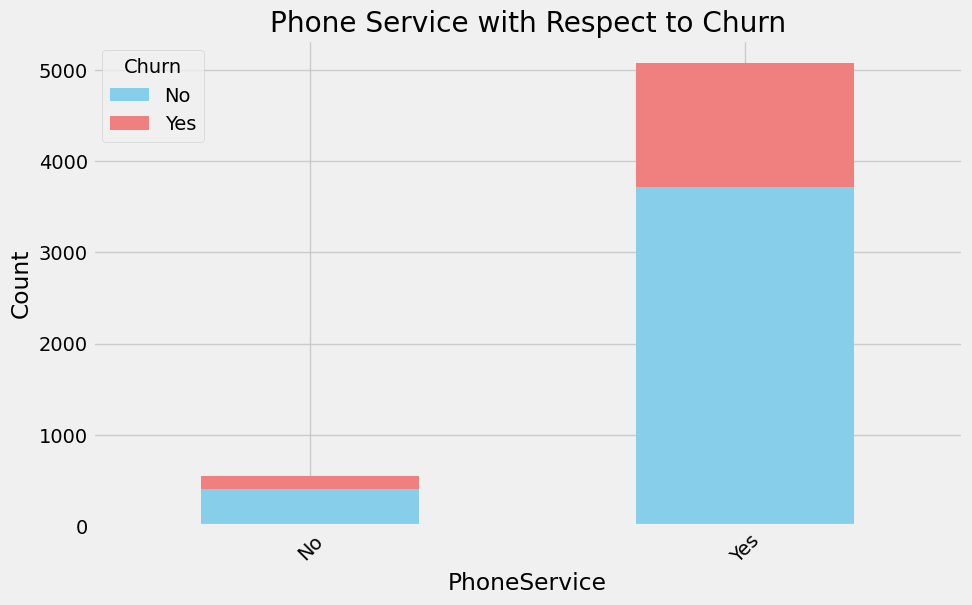

In [42]:
PhoneService_churn_counts = df.groupby(['PhoneService', 'Churn']).size().unstack()
PhoneService_churn_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

plt.title('Phone Service with Respect to Churn')
plt.xlabel('PhoneService')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

Very small fraction of customers don't have a phone service and out of that, 1/5th Customers are more likely to churn.

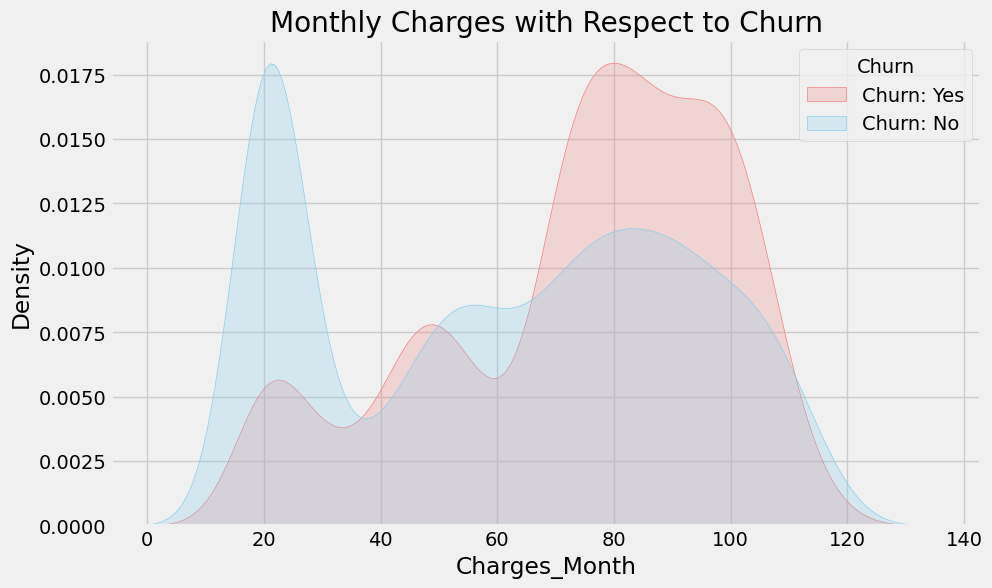

In [43]:
churn_yes = df[df['Churn'] == 'Yes']['Charges_Month']
churn_no = df[df['Churn'] == 'No']['Charges_Month']

plt.figure(figsize=(10, 6))
sns.kdeplot(churn_yes, label='Churn: Yes', shade=True, color='lightcoral')
sns.kdeplot(churn_no, label='Churn: No', shade=True, color='skyblue')

plt.title('Monthly Charges with Respect to Churn')
plt.xlabel('Charges_Month')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.show()

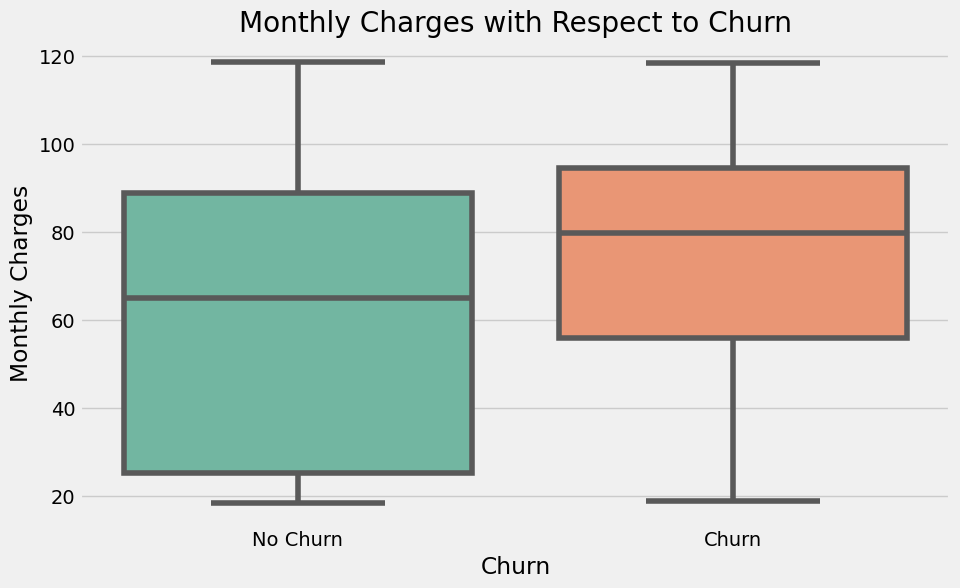

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Charges_Month', data=df, palette='Set2')

plt.title('Monthly Charges with Respect to Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

Customers with higher Monthly Charges are also more likely to churn

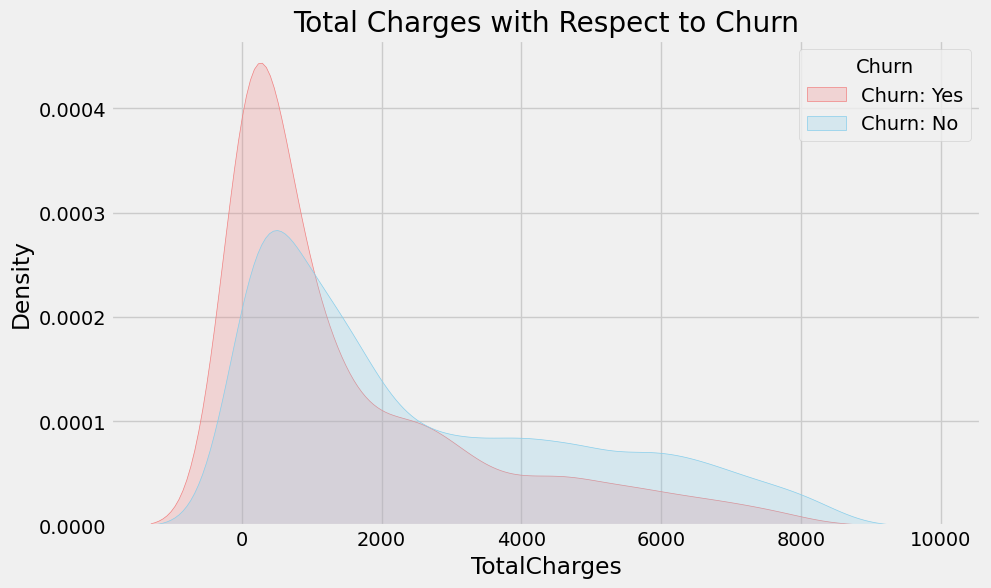

In [45]:
churn_yes = df[df['Churn'] == 'Yes']['TotalCharges']
churn_no = df[df['Churn'] == 'No']['TotalCharges']

plt.figure(figsize=(10, 6))
sns.kdeplot(churn_yes, label='Churn: Yes', shade=True, color='lightcoral')
sns.kdeplot(churn_no, label='Churn: No', shade=True, color='skyblue')

plt.title('Total Charges with Respect to Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.show()

Higher Total Charges have a lesser churn rate.

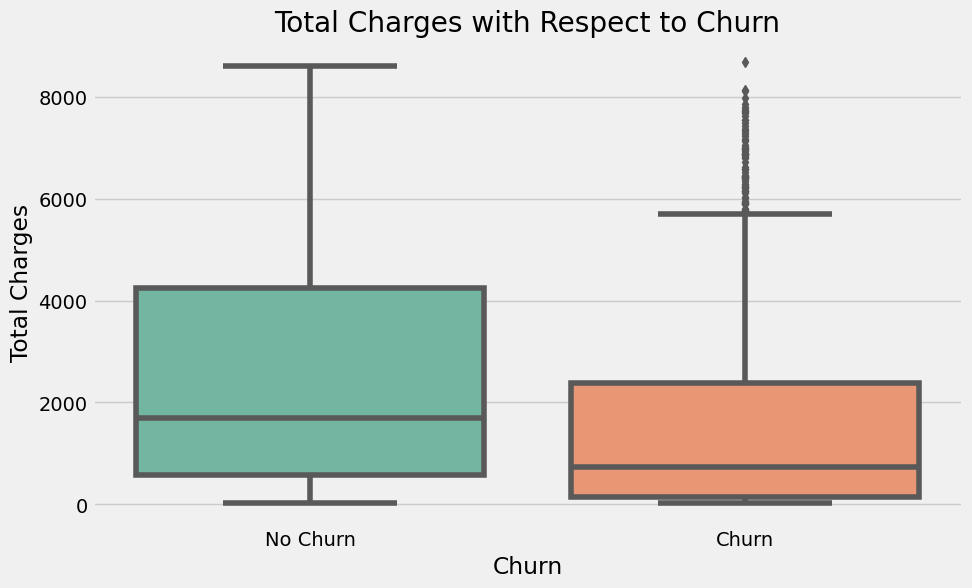

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2')

plt.title('Total Charges with Respect to Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

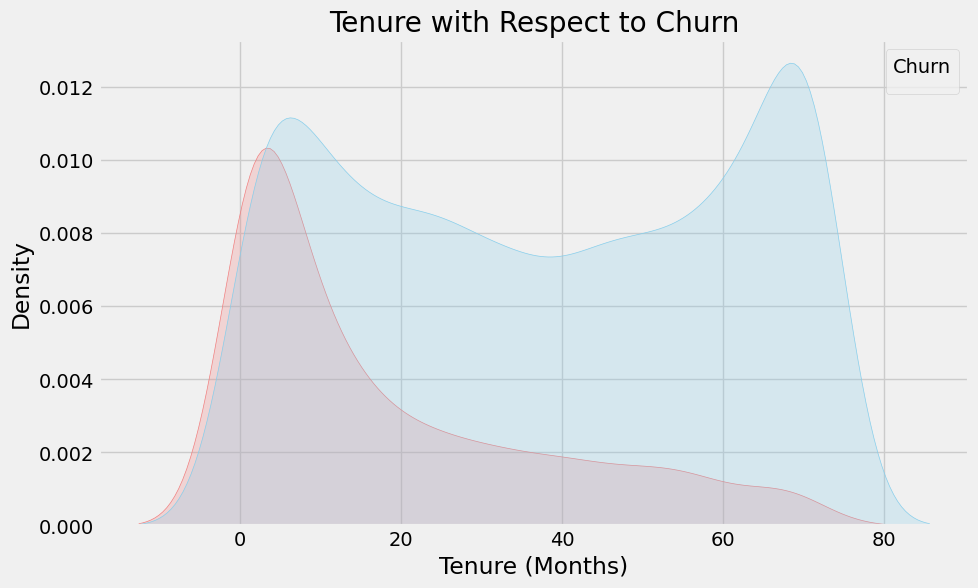

In [47]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', shade=True, palette=['skyblue', 'lightcoral'])

plt.title('Tenure with Respect to Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.legend(title='Churn')
plt.show()

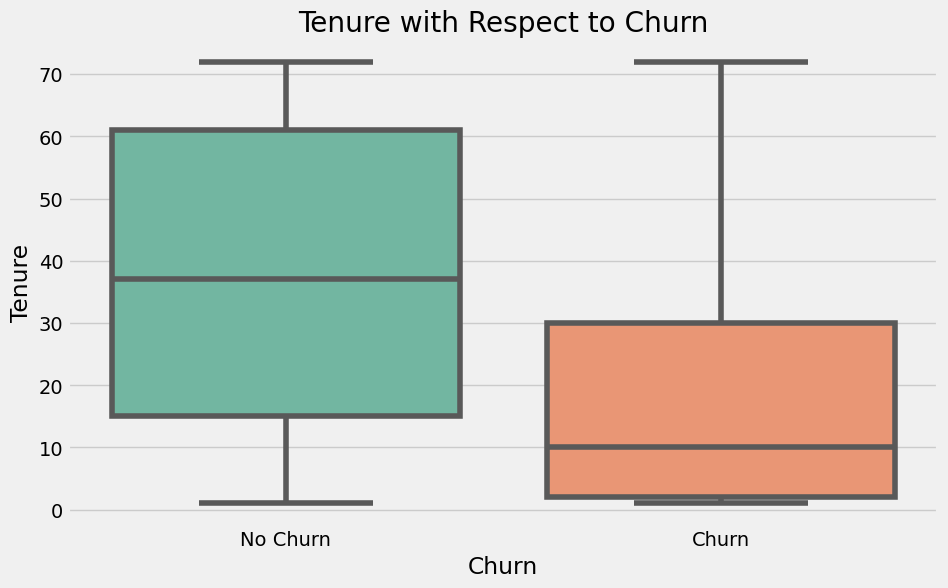

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')

plt.title('Tenure with Respect to Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

New Customers are more likely to churn.

## Heatmap

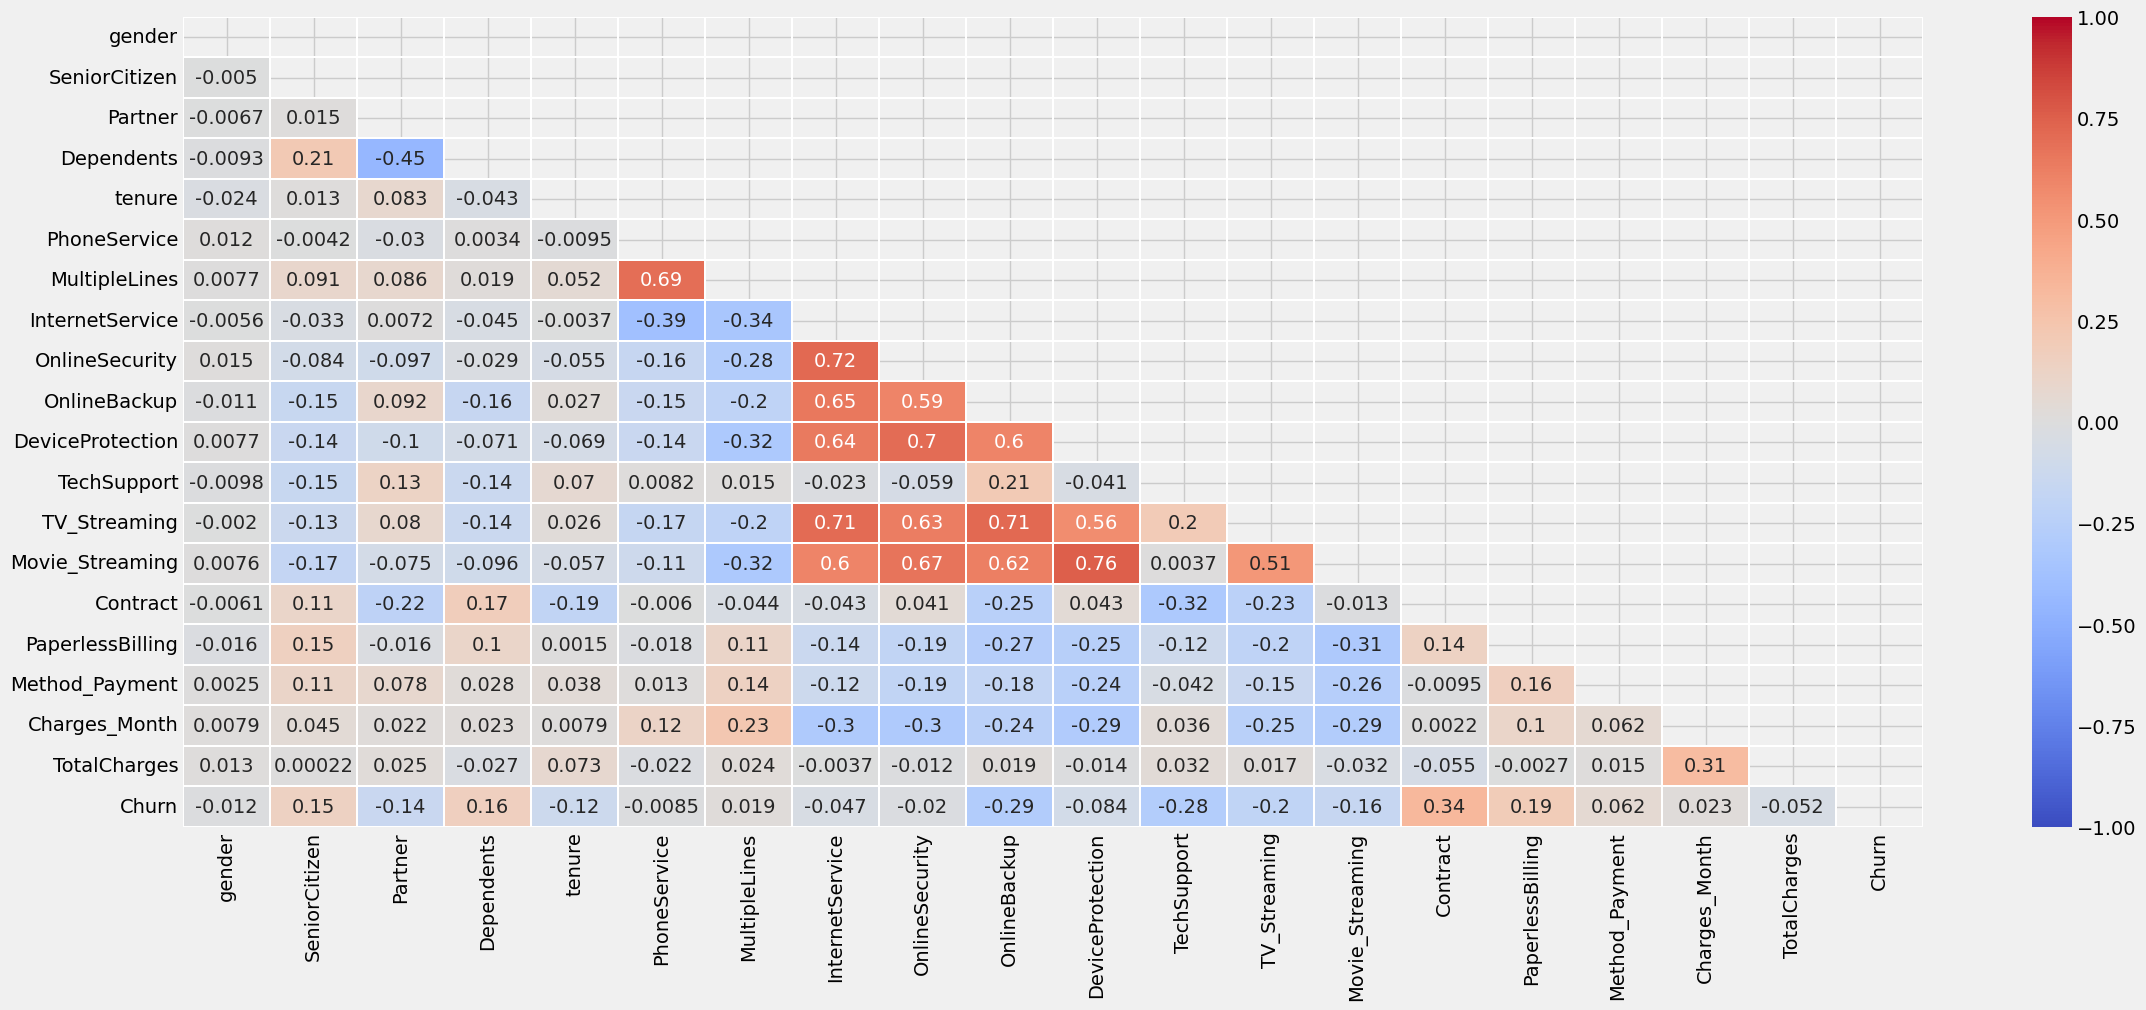

In [49]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, 
                 annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

There is high correlation between PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, InternetService, TV and Movie Streaming.

## **Key Observations from above Analysis**



Attributes affecting Customer Churn Rate are:
* Contract 
* Payment Method (Electronic Payment)
* Internet Service
* Dependents
* Partners
* Online Security
* Paperless Billing
* Tech Support
* Monthly Charges
* Tenure

### Observations<br>
* Customers having a **Month-to-Month** Contract are *more likely to churn*.
* Customers choosing **Fiber Optics** Internet Service have a *high churn rate*.
* **Absence of Online Security** is a *major contributor* to churn rate of cutomers
* Customers without any **dependents or having no partners** are *more likely* to churn
* Senior Citizens have a high churn rate.
* Cutomers having a **paperless billing** and **no tech support** are more likely to migrate to a different firm
* Cutomers having **high monthly charges** have more chances to leave.
* **New customers** have a high churn rate

## Data Preprocessing

In [50]:
num_cols = ['tenure', 'Charges_Month', 'TotalCharges']  
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'TV_Streaming', 'Movie_Streaming', 'Contract', 'PaperlessBilling', 'Method_Payment']  

Split the data into training and testing sets

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Churn']), df['Churn'], test_size=0.3, random_state=42)

Import the required libraries

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Define the transformers

In [53]:
num_transformer = SimpleImputer(strategy='mean')  # Impute missing values for numerical columns

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values for categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical columns
])

Combine transformers using ColumnTransformer

In [54]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

Fit and transform training and testing data (use only transform to prevent data leakage)

In [55]:
X_train_preprocessed = preprocessor.fit_transform(X_train)

X_test_preprocessed = preprocessor.transform(X_test)

Initialize the Random Forest Classifier and train the model on preprocessed training data

In [56]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_preprocessed, y_train)

RandomForestClassifier(random_state=42)

## Predict and Evaluate

Make predictions on testing data and evaluate the performance

In [57]:
y_pred = rf.predict(X_test_preprocessed)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1077  132]
 [ 248  231]]

Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.89      0.85      1209
         Yes       0.64      0.48      0.55       479

    accuracy                           0.77      1688
   macro avg       0.72      0.69      0.70      1688
weighted avg       0.76      0.77      0.76      1688



#### Calculate accuracy

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.77


Our model accuracy is 77%

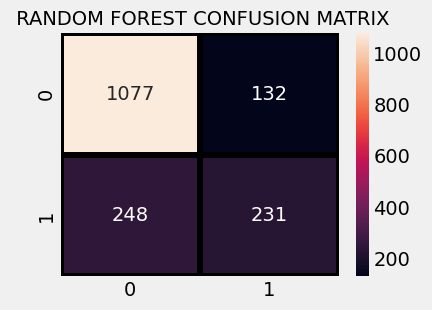

In [59]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

To increase the accuracy, we can attempt to remove the redundant attributes from the dataset, such as:
* Gender
* MultipleLines
* OnlineBackup

Also, we can Normalize the numerical data before training the model. We can also experiment with different ML models, such as XGBoost, Logistic Regression, etc., to check for best result, though, Random Forest gives a pretty good result as well.